# Multicollinearity

## 1) Definition:

Define a multivariate linear regression model such that

$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_p X_{pi} + \varepsilon_i$ for $i = 1, 2, \cdots, n$ and $\varepsilon_i$ ~ $N(0, \sigma^2)$ for any $i$

if $Corr(X_i, X_j) >> 0$ for any $i \neq j$, we can say that some of the predictor variables are **linearly correlated** and this regression model has **multicolinearity**.

## 2) Description:

Multicollinearity occurs in regression analysis when several predictor variables within a multiple regression model exhibit **strong correlations** with each other. This means that the value of one predictor can be expressed as a linear combination of other predictor variables. This instability hinders the accurate determination of the individual relationships between each predictor and the dependent variable and leads to a decrease in statistical significance of each predictor variable.

## 3) Demonstration and Diagram:

In [9]:
# Libraries
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Download real world data where some of the exog variables are correlated
# We will use AAPL, GOOG, MSFT, TLT as exogenous (predictor) variables
# to fit a multivariate regression model to predict TSLA values as endogenous (dependent) variables
# We will look at the data for the last 5 years
end = datetime.datetime.now()
timedelta = datetime.timedelta(5 * 365)  # last 5 years
start = end - timedelta
df = yf.download(["AAPL", "GOOG", "MSFT", "TLT", "TSLA"], start, end)["Adj Close"]  # use adjusted close column
# Show first few rows of dataframe
df.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,GOOG,MSFT,TLT,TSLA
Date,,,,,
2018-12-12,40.576004,53.183998,103.582069,106.036308,24.440001
2018-12-13,41.019905,53.095001,103.933403,105.785439,25.119333
2018-12-14,39.707378,52.105000,100.685806,106.152786,24.380667
2018-12-17,39.337845,50.826500,97.704056,106.771004,23.228001
2018-12-18,39.848949,51.435501,98.729607,107.410431,22.468666


          AAPL      GOOG      MSFT       TLT
AAPL  1.000000  0.902939  0.972372 -0.327973
GOOG  0.902939  1.000000  0.943019 -0.197869
MSFT  0.972372  0.943019  1.000000 -0.277062
TLT  -0.327973 -0.197869 -0.277062  1.000000


<Axes: >

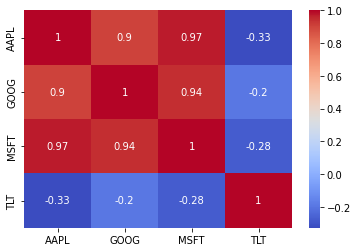

In [10]:
# Look at the correlation matrix for exog variables
exog_corr = df.iloc[:, :4].corr()
# Print the exogenous correlation matrix
print(exog_corr)
# Plot the exogenous correlation matrix
sns.heatmap(exog_corr, annot=True, cmap='coolwarm')

As we can see in the correlation matrix and the plot, because **AAPL, GOOG, MSFT** all show <u> very high </u> correlations with each other, we can say this group of exogenous variables have a **multicolinearity** issue. Therefore, we can expect to reduce the dimensionality of our data after we apply **dimensionality reduction methods** to our dataframe, because some of them will be **statistically insignificant** to explain the variation in **TSLA** values.

## 4) Diagnosis

We can detect **multicollinearity** by creating a **correlation matrix** of the exogenous (predictor) variables. If at least one pair shows high Pearson correlation ($\rho >> 0$), we can declare our set of predictor variables has a **multicollinearity** problem.

## 5) Damage

**Multicollinearity** in a regression model can have severe consequences if it is not taken care of:

* High correlation among independent variables in a regression model leads to increased standard errors for coefficient estimates $\hat{\beta_i}$, resulting in less precise coefficient estimates with wider confidence intervals.

* Multicollinearity reduces the **statistical significance** in coefficient estimates with increased $p$ values, despite potentially high $R^2$ values. From this perspective, multicollinearity complicates identifying the distinct impact of each variable.

As a result, **multicollinearity** decreases our confidence in the regression model and our estimates, and may lead to scraping of the model completely if not handled properly.

## 6) Directions

Although we can use several methods such as dropping exogenous variables with high correlations and fitting regressions to the exogenous variables themselves; an industry standard is to use **Principal Component Analysis (PCA)** to address the issue of **multicollinearity**. Principal Component Analysis creates new variables that are <u> linear functions of the original predictor variables </u> which explain most of the **variation** in the data, thus letting us pick the principal components which provide the most information; effectively letting us reduce the dimensionality of our data.

In [21]:
# Create dataframe only consisting of exogenous variables (excludes TSLA)
exog_df = df.iloc[:, :4]
exog_df.head()

,AAPL,GOOG,MSFT,TLT
Date,,,,
2018-12-12,40.576004,53.183998,103.582069,106.036308
2018-12-13,41.019905,53.095001,103.933403,105.785439
2018-12-14,39.707378,52.105000,100.685806,106.152786
2018-12-17,39.337845,50.826500,97.704056,106.771004
2018-12-18,39.848949,51.435501,98.729607,107.410431


In [22]:
# Standardize our data for PCA
std_exog_arr = preprocessing.scale(exog_df)
std_exog_arr  # all columns in the array have 0 mean and unit variance

array([[-1.69071913, -1.47626496, -1.71170443, -0.84903788],
       [-1.68125665, -1.47921172, -1.7069021 , -0.86174995],
       [-1.70923531, -1.51199146, -1.751293  , -0.8431357 ],
       ...,
       [ 1.54395429,  1.11452201,  1.91351794, -1.36418509],
       [ 1.58552169,  1.34695992,  1.94290629, -1.39205485],
       [ 1.61621771,  1.28702946,  1.98774008, -1.43157896]])

In [23]:
# Apply PCA to our standardized array of values
pca = PCA(n_components=4)
pca.fit(std_exog_arr)

# Calculate explained variance and cumulative explained variance ratios
ex_var = pca.explained_variance_ratio_
cum_ex_var = np.cumsum(pca.explained_variance_ratio_)

# Put the results into a dataframe
cols = [f"pc{i+1}" for i in range(len(ex_var))]
rows = ["Explained Variance", "Cumulative Explained Variance"]
pca_ex_var_df = pd.DataFrame([ex_var, cum_ex_var], index=rows, columns=cols)
pca_ex_var_df

,pc1,pc2,pc3,pc4
Explained Variance,0.746915,0.225323,0.022774,0.004988
Cumulative Explained Variance,0.746915,0.972238,0.995012,1.000000


We can see that the first 2 principal components explain ~$97.2$% of the variance. Then, we can confidently keep **pc1** and **pc2** and drop the rest.

In [24]:
# Coefficients of the 4 Principal Components
exog_pc_df = pd.DataFrame(pca.components_.T, index=list(exog_df.columns), columns=cols)
exog_pc_df

,pc1,pc2,pc3,pc4
AAPL,0.566292,-0.058720,0.596374,-0.565865
GOOG,0.550260,-0.210725,-0.771369,-0.240415
MSFT,0.569828,-0.124781,0.194815,0.788526
TLT,-0.227647,-0.967769,0.106656,-0.014987


After seeing the coefficients for **principal components**, we can finally fit an OLS model using **pc1** and **pc2**; while dropping the rest of the **pc**s.

In [27]:
# Add the daily values for pc1 and pc2, according to the coefficients in the above table
df["pc1"] = np.array([df.iloc[:, i] * exog_pc_df.iloc[i, 0] for i in range(4)]).sum(axis=0)
df["pc2"] = np.array([df.iloc[:, i] * exog_pc_df.iloc[i, 1] for i in range(4)]).sum(axis=0)

# Fit an OLS model using pc1 and pc2
model_pca_OLS = smf.ols("TSLA ~ pc1 + pc2", df).fit()
model_pca_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TSLA   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3335.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:54:03   Log-Likelihood:                -6521.9
No. Observations:                1257   AIC:                         1.305e+04
Df Residuals:                    1254   BIC:                         1.307e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.2862      9.785    -23.331      0.000    -247.483    -209.090
pc1            1.0288      0.017     61.261      0.000       0.996       1.062
pc2           -0.9495      0.063    -14.995      0.000      -1.074      -0.825
==============================================================================
Omnibus:                       32.728   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.529
Skew:                           0.379   Prob(JB):                     5.24e-08
Kurtosis:                       2.741   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see from the results table, we have an $R^2$ value of $R^2 = 0.842$ which shows our model is a good fit. Moreover, looking at the $P>|t|$ values for the pc1 and pc2 predictor variables, they have $p$ values of $p = 0.000$ which shows these variables are extremely statistically significant in explaining the variation of **TSLA** in the model. Therefore, we can confidently conclude that our principal component analysis ended up successfully solving the **multicollinearity** problem in our dataset and resulted in a good OLS regression model.

Then we can plot our linear regression model using the coefficients from our results above:

$TSLA = -228.2862 + 1.0288 * pc1 + (-0.9495) * pc2$

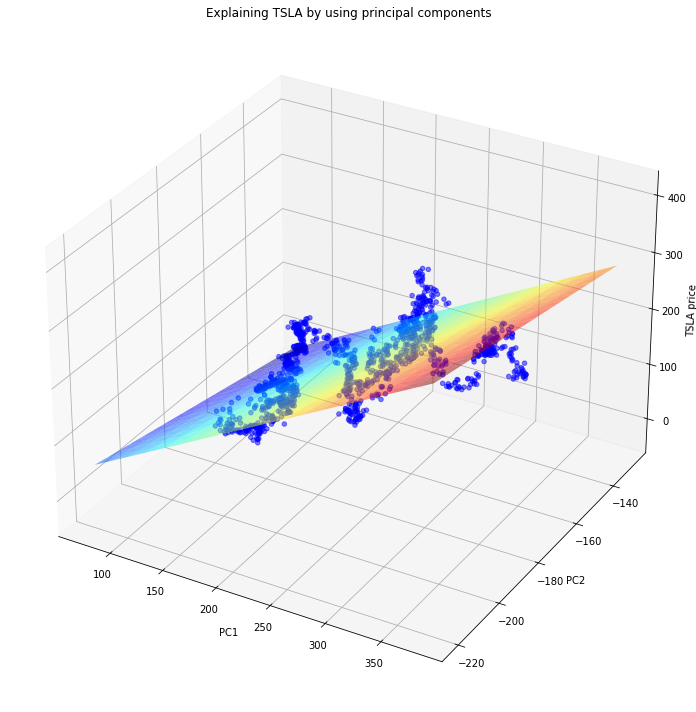

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for pc1 and pc2
x = np.linspace(df['pc1'].min(), df['pc1'].max(), 20)
y = np.linspace(df['pc2'].min(), df['pc2'].max(), 20)
xx, yy = np.meshgrid(x, y)
model_viz = np.array([xx.flatten(), yy.flatten()]).T

# Generate predictions
predicted = model_pca_OLS.predict(exog=dict(pc1=model_viz[:, 0], pc2=model_viz[:, 1]))

# Create the 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['pc1'], df['pc2'], df['TSLA'], color='b', marker='o', alpha=0.5)
ax.plot_trisurf(model_viz[:, 0], model_viz[:, 1], predicted, alpha=0.5, cmap='jet')

# Labels and titles
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('TSLA price')
plt.title('Explaining TSLA by using principal components')
plt.tight_layout()